<p style="background: linear-gradient(to right,#BF3131,white);
          color: transparent;
          font-family: Georgia;
          color: white;
          font-size: 120%;
          text-align: left;
          padding: 15px;
          letter-spacing:1px;">
   Data Preparation Steps
</p>

1. [Concatenate all the DataFrames](#1)
2. [Rename the column 'Unnamed: 0' to 'name'](#2)
3. [Convert likes to float. Range 0-1](#3)
4. [Convert time from string to int in minutes](#4)
5. [Convert servings from string to int](#5)
6. [Create calories, fat, carbs, fiber, sugar, protein from nutritions column](#6)
7. [Create no of ingredients column 'no_ing'](#7)
8. [Fill missing values in the 'time' column with the mode](#8)
9. [Fill missing values in the columns calories, fat and carb using randomforest model predictions](#9)
10. [Fill the missing values in the columns fiber, sugar and protein with the mode](#10)
11. [Create binary columns contains_soy and contains_glutten to indicate the allergies](#11)
12. [Create binary columns like fruits, vegs etc for main ingredients](#12) 


<a id='1'></a>
<p style="background: linear-gradient(to right,#BF3131,white);
          color: transparent;
          font-family: Georgia;
          color: white;
          font-size: 120%;
          text-align: left;
          padding: 15px;
          letter-spacing:1px;">
   Concatenating the Datasets
</p>

In [1]:
# importing all the necessary libraries

import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import warnings
warnings.filterwarnings('ignore')

In [3]:
# loading all the datasets
df1 = pd.read_csv('recipes.csv')
df2 = pd.read_csv('recipes2.csv')
df3 = pd.read_csv('recipes3.csv')
df4 = pd.read_csv('recipes4.csv')
df5 = pd.read_csv('recipes5.csv')
df6 = pd.read_csv('recipes6.csv')
df7 = pd.read_csv('recipes7.csv')
df8 = pd.read_csv('recipes8.csv')
df9 = pd.read_csv('recipes9.csv')
df10 = pd.read_csv('recipes10.csv')

In [5]:
# combining all the datasets

dfs = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10]

df = pd.concat(dfs)

df.shape

(1012, 7)

In [6]:
df.columns

Index(['Unnamed: 0', 'likes', 'time', 'servings', 'ingredients', 'nutritions',
       'link'],
      dtype='object')

In [7]:
df.head(3)

,Unnamed: 0,likes,time,servings,ingredients,nutritions,link
0,Whipped Coffee,92% WOULD MAKE AGAIN,15 minutes,for 1 serving,2 tablespoons hot water (28 g); 2 tablespoons ...,Calories 132\nFat 0g\nCarbs 28g\nFiber 0g\nSug...,https://tasty.co/recipe/whipped-coffee
1,Ratatouille,95% WOULD MAKE AGAIN,Total Time\n1 hr 35 min\nPrep Time\n20 minutes...,for 8 servings,2 eggplants; 6 roma tomatoes; 2 yellow squashe...,Calories 118\nFat 3g\nCarbs 22g\nFiber 5g\nSug...,https://tasty.co/recipe/ratatouille
2,Homemade Dutch Oven Bread,98% WOULD MAKE AGAIN,NaN,for 8 servings,"2 cups lukewarm water (480 mL), between 90˚-11...",Calories 259\nFat 0g\nCarbs 54g\nFiber 1g\nSug...,https://tasty.co/recipe/homemade-dutch-oven-bread


<a id='2'></a>
<p style="background: linear-gradient(to right,#BF3131,white);
          color: transparent;
          font-family: Georgia;
          color: white;
          font-size: 120%;
          text-align: left;
          padding: 15px;
          letter-spacing:1px;">
   Rename the columns
</p>

In [8]:
# renaming the Unnamed: 0 column to name
df.rename(columns={'Unnamed: 0': 'name'}, inplace=True)
df.columns

Index(['name', 'likes', 'time', 'servings', 'ingredients', 'nutritions',
       'link'],
      dtype='object')

In [12]:

# Drop rows where all columns except 'link' have missing values
df.dropna(subset=df.columns.difference(['link']), how='all', inplace=True)

In [13]:
df.shape

(1008, 7)

<a id='3'></a>
<p style="background: linear-gradient(to right,#BF3131,white);
          color: transparent;
          font-family: Georgia;
          color: white;
          font-size: 120%;
          text-align: left;
          padding: 15px;
          letter-spacing:1px;">
   Convert 'likes' from string to float
</p>

In [9]:
df['likes'].unique()

array(['92% WOULD MAKE AGAIN', '95% WOULD MAKE AGAIN',
       '98% WOULD MAKE AGAIN', '93% WOULD MAKE AGAIN',
       '97% WOULD MAKE AGAIN', '96% WOULD MAKE AGAIN',
       '88% WOULD MAKE AGAIN', '89% WOULD MAKE AGAIN',
       '94% WOULD MAKE AGAIN', '87% WOULD MAKE AGAIN',
       '85% WOULD MAKE AGAIN', '99% WOULD MAKE AGAIN',
       '91% WOULD MAKE AGAIN', '90% WOULD MAKE AGAIN',
       '76% WOULD MAKE AGAIN', '74% WOULD MAKE AGAIN',
       '86% WOULD MAKE AGAIN', '75% WOULD MAKE AGAIN',
       '84% WOULD MAKE AGAIN', '79% WOULD MAKE AGAIN',
       '81% WOULD MAKE AGAIN', '80% WOULD MAKE AGAIN',
       '83% WOULD MAKE AGAIN', '82% WOULD MAKE AGAIN',
       '54% WOULD MAKE AGAIN', '71% WOULD MAKE AGAIN',
       '78% WOULD MAKE AGAIN', '58% WOULD MAKE AGAIN',
       '73% WOULD MAKE AGAIN', '22% WOULD MAKE AGAIN',
       '70% WOULD MAKE AGAIN', '68% WOULD MAKE AGAIN',
       '24% WOULD MAKE AGAIN', '59% WOULD MAKE AGAIN',
       '51% WOULD MAKE AGAIN', '36% WOULD MAKE AGAIN',
       '67

Every item start with a 2 digit number. So we extract those two digits and divide them by 100 to get the rate of people who like it

In [17]:
def get_likes(string):
    if pd.isnull(string):  # Check if the value is NaN
        return None
    return int(string[:2])/100

In [18]:
df['likes'] = df['likes'].apply(get_likes)
df['likes'].head()

0    0.92
1    0.95
2    0.98
3    0.93
4    0.93
Name: likes, dtype: float64

In [19]:
df['time'].unique()

array(['15 minutes',
       'Total Time\n1 hr 35 min\nPrep Time\n20 minutes\nCook Time\n1 hr 15 min',
       nan, 'Under 30 minutes', '25 minutes',
       'Total Time\n45 minutes\nPrep Time\n30 minutes\nCook Time\n15 minutes',
       '10 minutes',
       'Total Time\n40 minutes\nPrep Time\n5 minutes\nCook Time\n30 minutes',
       'Total Time\n1 hr 15 min\nPrep Time\n20 minutes\nCook Time\n55 minutes',
       '1 hr 10 min',
       'Total Time\n20 minutes\nPrep Time\n5 minutes\nCook Time\n15 minutes',
       'Total Time\n18 hr\nPrep Time\n20 minutes\nCook Time\n1 hr 30 min',
       'Total Time\n12 hr 25 min\nPrep Time\n5 minutes\nCook Time\n20 minutes',
       'Total Time\n14 hr 57 min\nPrep Time\n20 minutes\nCook Time\n37 minutes',
       '1 hr 20 min',
       'Total Time\n1 hr 5 min\nPrep Time\n10 minutes\nCook Time\n25 minutes',
       'Total Time\n2 hr\nPrep Time\n30 minutes\nCook Time\n1 hr 30 min',
       'Total Time\n10 minutes\nPrep Time\n5 minutes\nCook Time\n5 minutes',
      

This is a little challenging because some recipes require like 1 hr 5 min. We can't just extract the first number and assume it's in minutes. Hence the following function

In [20]:
def get_time_minutes(time_str):
    if pd.isnull(time_str):  # Check if the value is NaN
        return None
    # Define regular expression pattern to match numbers
    pattern = r'\b\d+\b'

    # Find all numbers in the string
    numbers = re.findall(pattern, time_str)

    # Convert numbers to integers and sum them up
    total_minutes = sum(int(num) for num in numbers)

    return total_minutes


In [21]:
df['time'] = df['time'].apply(get_time_minutes)

df['time'].head()

0    15.0
1    72.0
2     NaN
3    30.0
4     NaN
Name: time, dtype: float64

In [22]:
df['servings'].unique()

array(['for 1 serving', 'for 8 servings', 'for 4 servings',
       'for 2 servings', 'for 6 servings', 'for 10 servings',
       'for 8 cookies', 'for 2 pancakes', 'for 5 servings',
       'for 3 servings', 'for 8 serving', 'for 2 cups', 'for 9 servings',
       'for 2 serving', 'for 24 bars', 'for 4 serving', 'for 12 servings',
       'for 12 balls', 'for 13 cookies', 'for 10 cups', 'for 16 servings',
       'for 15 bites', 'for 12 doughnuts', 'for 20 servings',
       'for 6 popsicles', 'for 8 skewers', 'for 24 pot stickers',
       'for 6 donuts', 'for 1 loaf', 'for 4 skewers', 'for 2 tacos',
       'for 20 bars', 'for 12 cupcakes', 'for 22 rice balls',
       'for 10 cupcakes', 'for 8 cups', 'for 6 cups',
       'for 12 Pizza Bagels', 'for 4 bowls', 'for 16 bars',
       'for 16 falafels', 'for 1 cup', 'for 14 tacos', 'for 20 pieces',
       'for 5 sandwiches', 'for 4 shots', 'for 25 pieces',
       'for 24 servings', 'for 6 ice pops', 'for 4 pancakes',
       'for 12 bars', 'for 1

All the items start with 'for ' and all the items have only one number in them. So we just extract that number using re

In [23]:
def get_servings(string):
    temp = re.findall(r'\d+', string)
    res = list(map(int, temp))
    # get the first number (the only number)
    return res[0]

# testing our function
print(get_servings('for 1 serving'))
print(get_servings('for 24 bars'))

1
24


In [24]:
df['servings'] = df['servings'].apply(get_servings)

df['servings'].head()

0    1
1    8
2    8
3    4
4    1
Name: servings, dtype: int64

In [25]:
df['nutritions'].isnull().sum()

82

we create 6 different columns from the nutritions column. Fortunately, except for the missing values in this column, every other item has information about all these 6 nutrients. namely,
- calories
- fat
- carbs
- fiber
- sugar
- protein

So if we extract all the number in an item, we get 6. So we assign them to these 6 nutrients (remember the order matters)

In [26]:
def get_calories(string):
    if pd.isnull(string):  # Check if the value is NaN
        return None
    temp = re.findall(r'\d+', string)
    res = list(map(int, temp))
    return res[0]

def get_fat(string):
    if pd.isnull(string):  # Check if the value is NaN
        return None
    temp = re.findall(r'\d+', string)
    res = list(map(int, temp))
    return res[1]


def get_carbs(string):
    if pd.isnull(string):  # Check if the value is NaN
        return None
    temp = re.findall(r'\d+', string)
    res = list(map(int, temp))
    return res[2]


def get_fiber(string):
    if pd.isnull(string):  # Check if the value is NaN
        return None
    temp = re.findall(r'\d+', string)
    res = list(map(int, temp))
    return res[3]

def get_sugar(string):
    if pd.isnull(string):  # Check if the value is NaN
        return None
    temp = re.findall(r'\d+', string)
    res = list(map(int, temp))
    return res[4]


def get_protein(string):
    if pd.isnull(string):  # Check if the value is NaN
        return None
    temp = re.findall(r'\d+', string)
    res = list(map(int, temp))
    return res[5]


In [27]:
df['calories'] = df['nutritions'].apply(get_calories)
df['fat'] = df['nutritions'].apply(get_fat)
df['carbs'] = df['nutritions'].apply(get_carbs)
df['fiber'] = df['nutritions'].apply(get_fiber)
df['sugar'] = df['nutritions'].apply(get_sugar)
df['protein'] = df['nutritions'].apply(get_protein)

In [28]:
df.columns

Index(['name', 'likes', 'time', 'servings', 'ingredients', 'nutritions',
       'link', 'calories', 'fat', 'carbs', 'fiber', 'sugar', 'protein'],
      dtype='object')

In [29]:
# now that this column is useless, drop it
df.drop(['nutritions'], axis = 1, inplace=True)

In [30]:
# creating number_of_ingredients column
def get_no_of_ingredients(string):
    return len(string.split('; '))

df['no_ing'] = df['ingredients'].apply(get_no_of_ingredients)
df['no_ing'].head()

0     5
1    20
2     5
3     6
4     3
Name: no_ing, dtype: int64

In [31]:
df['no_ing'].max()

60

In [32]:
df.isnull().sum()

name             0
likes          170
time           404
servings         0
ingredients      0
link             0
calories        82
fat             82
carbs           82
fiber           82
sugar           82
protein         82
no_ing           0
dtype: int64

### Handling Missing Values

#### Time

About half the values are missing in this column. We check if there is a strong correlation between any other feature and time. if so, it might help us fill the missing values in this column

time vs servings

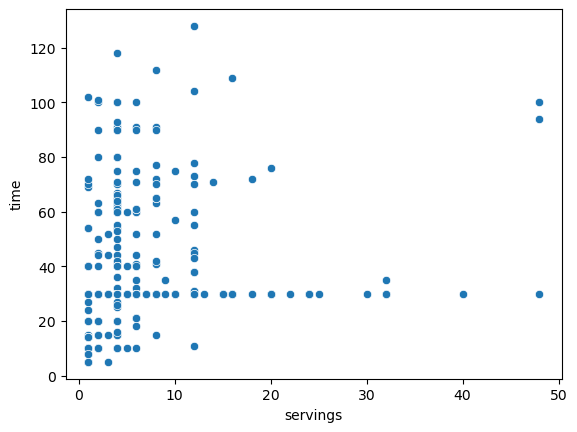

In [33]:

sns.scatterplot(x='servings', y='time', data=df)
plt.show()

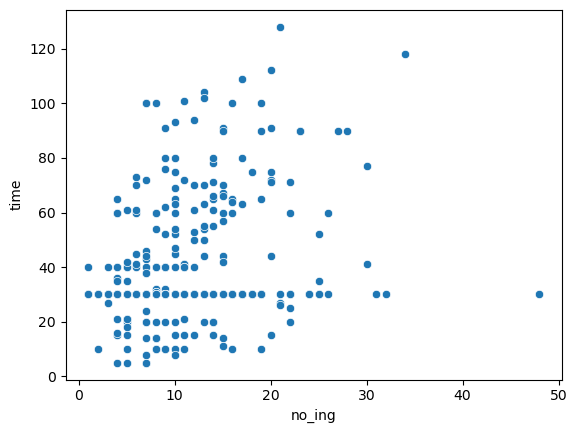

In [34]:
sns.scatterplot(x='no_ing', y='time', data=df)
plt.show()

These is no good relationship with time. So this method is not good

In [35]:
# mode of the time column
df['time'].mode()

0    30.0
dtype: float64

In [36]:
# mean of the time column
df['time'].mean()

35.63576158940398

What if we could build a regression model for the part of the dataframe with no missing values and the target column as 'time'?

Here, we check how good the predictions would be if we did that. If we have a good result, we can fill the missing values with its predictions

In [37]:
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import r2_score

# time_df = df.dropna()

# time_x = time_df.drop(['time', 'name', 'ingredients', 'link'], axis=1)
# time_y = time_df.time

# time_xtrain, time_xtest, time_ytrain, time_ytest = train_test_split(time_x, time_y, test_size=0.1)

# model = RandomForestRegressor()
# model.fit(time_xtrain, time_ytrain)

# score = r2_score(model.predict(time_xtest), time_ytest)
# score


-1.0103626837789026

okay that's too bad. Let's just forget about this

In [38]:
# filling the missing values in the 'time' column with the mode

df['time'] = df['time'].fillna(df['time'].mode()[0])
df['time'].isnull().sum()


0

Handling missing values of the 6 nutrients columns

Checking the correlation between these 6 features. if there's a good correlation, we can use that to fill the missing values

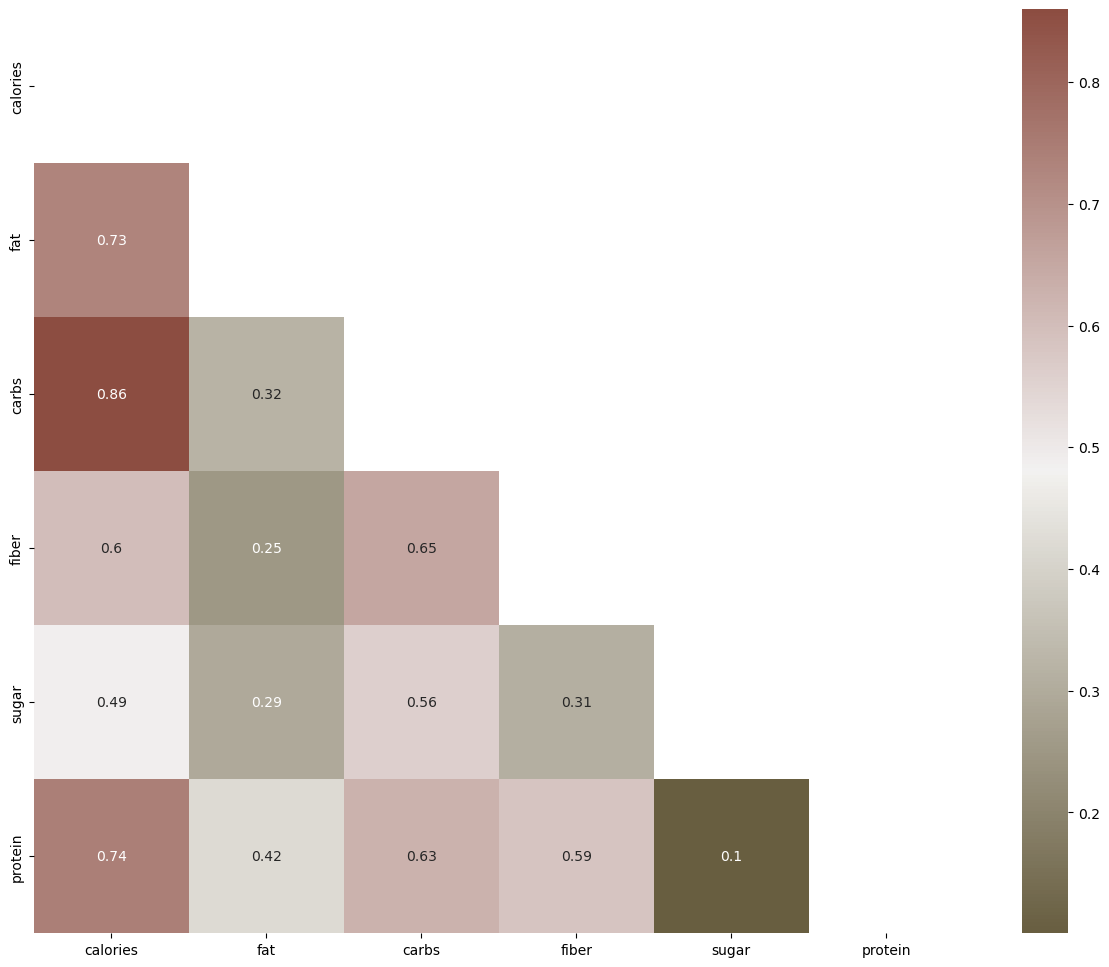

In [39]:
df_corr = df[['calories', 'fat', 'carbs', 
              'fiber', 'sugar', 'protein']].corr()
mask = np.triu(np.ones_like(df_corr))
corr = df_corr.transpose()
cmap = sns.diverging_palette(70,20,s=50, l=40, n=6,as_cmap=True)

plt.figure(figsize=(15, 12))
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True)
plt.show()

Let's test our strategy. Let's drop the rows with missing values and train a random forest model to see the accuracy of predictions. Based on these results, let's decide how to fill the missing values

In [40]:
def get_acc(df, col):
    cols = ['calories','fat', 'carbs', 'fiber', 'sugar', 'protein']
    # removing the col because it's the target variable
    cols.remove(col)
    
    col_df = df.dropna()
    col_x = col_df[cols]
    col_y = col_df[col]
    
    col_xtrain, col_xtest, col_ytrain, col_ytest = train_test_split(col_x, col_y, test_size=0.2, random_state=1)
    
    model = RandomForestRegressor()
    model.fit(col_xtrain, col_ytrain)
    
    score = r2_score(model.predict(col_xtest), col_ytest)
    return score

cols = ['calories','fat', 'carbs', 'fiber', 'sugar', 'protein']
for col in cols:
    print(col)
    print(get_acc(df, col))
    print()
    

calories
0.9092449260398057

fat
0.8240292709837904

carbs
0.8377987805596195

fiber
0.39857481448839305

sugar
0.3373575765046235

protein
0.01789252087474591



calories, fat and carbs have good accuracy

In [41]:
cols = ['calories', 'fat', 'carbs']

In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import numpy as np
from sklearn.impute import SimpleImputer

def fill_missing(df, col):
    # Separate data with and without missing values for the target column
    missing_data = df[df[col].isnull()]
    valid_data = df.dropna(subset=[col])
    
    # Prepare data for training
    cols = ['calories','fat', 'carbs', 'fiber', 'sugar', 'protein']
    cols.remove(col)
    
    # Impute missing values in features
    imputer = SimpleImputer(strategy='median')  # You can choose 'mean', 'median', or 'most_frequent'
    imputed_data = imputer.fit_transform(valid_data[cols])
    valid_data_imputed = pd.DataFrame(imputed_data, columns=cols)
    
    # Train the model
    model = RandomForestRegressor()
    model.fit(valid_data_imputed, valid_data[col])
    
    # Predict missing values
    imputed_missing_data = imputer.transform(missing_data[cols])
    missing_data_imputed = pd.DataFrame(imputed_missing_data, columns=cols)
    missing_data['predicted_' + col] = model.predict(missing_data_imputed)
    
    # Replace missing values with predicted values
    df.loc[df[col].isnull(), col] = missing_data['predicted_' + col]
    
    return df

# Assuming df is your DataFrame
for col in cols:
    df = fill_missing(df, col)


In [43]:
df.isnull().sum()

name             0
likes          170
time             0
servings         0
ingredients      0
link             0
calories         0
fat              0
carbs            0
fiber           82
sugar           82
protein         82
no_ing           0
dtype: int64

For the rest of the columns, let's fill the missing values with the mode of it

In [44]:
df['fiber'].fillna(df['fiber'].mode()[0], inplace=True)
df['sugar'].fillna(df['sugar'].mode()[0], inplace=True)
df['protein'].fillna(df['protein'].mode()[0], inplace=True)

In [45]:
df.isnull().sum()

name             0
likes          170
time             0
servings         0
ingredients      0
link             0
calories         0
fat              0
carbs            0
fiber            0
sugar            0
protein          0
no_ing           0
dtype: int64

In [54]:
df['likes'].mode()

0    0.96
dtype: float64

In [55]:
df['likes'].median()

0.9

In [56]:
df['likes'].fillna(df['likes'].median(), inplace=True)

In [58]:
df.isnull().sum().sum()

0

In [46]:
soy_keywords = ['soy', 'tofu', 'tempeh', 'soybean', 'soya']

# returns true if soy is in ingredients list else 0
def contains_soy(string):
    for soy in soy_keywords:
        if soy in string.lower():
            return 1
    return 0

df['contains_soy'] = df['ingredients'].apply(contains_soy)

glutten allergies:

- Wheat
- Barley
- Rye
- Triticale
- Bulgur
- Couscous
- Farina
- Graham flour
- Semolina
- Spelt
- Kamut
- Wheat germ
- Wheat bran
- Malt
- Brewer's yeast

In [47]:
glutten_keywords = ['wheat', 'barley', 'rye', 
                    'Triticale', 'Bulgur','Couscous', 
                    'Farina', 'Graham', 'Semolina',
                    'Spelt', 'Kamut', 'Malt',
                   'all-purpose flour']
                    
def contains_glutten(string):
    for glutten in glutten_keywords:
        if glutten.lower() in string.lower():
            return 1
    return 0

df['contains_glutten'] = df['ingredients'].apply(contains_glutten)

In [108]:
df.sample(10)

,name,likes,time,servings,ingredients,link,calories,fat,carbs,fiber,sugar,protein,no_ing,contains_soy,contains_glutten
11,Avocado Quinoa Power Salad,0.95,30.0,6,"2 cups water (480 mL); salt, to taste; 1 cup q...",https://tasty.co/recipe/avocado-quinoa-power-s...,221.00,11.0,25.00,6.0,1.0,5.0,10,0,0
81,Slow-Cooker Applesauce And Apple Butter,0.97,30.0,10,"12 red apples, combination of gala, honeycrip,...",https://tasty.co/recipe/slow-cooker-applesauce...,189.00,0.0,50.00,8.0,37.0,1.0,8,0,0
84,Spicy Roasted Chickpeas,0.91,30.0,1,"15 oz chickpeas (425 g), 1 can, drained and ri...",https://tasty.co/recipe/spicy-roasted-chickpeas,737.00,15.0,115.00,34.0,20.0,38.0,6,0,0
31,Banana Berry Nice Cream,0.92,30.0,4,3 bananas; ½ cup frozen mixed berry (75 g); 1 ...,https://tasty.co/recipe/banana-berry-nice-cream,116.00,0.0,28.00,3.0,14.0,1.0,4,0,0
76,Lentil Soup,0.96,30.0,5,2 tablespoons olive oil; 1 medium yellow onion...,https://tasty.co/recipe/lentil-soup,370.00,2.0,68.00,10.0,7.0,21.0,12,0,0
84,Vegan Pumpkin Cupcakes With Maple Frosting,0.94,30.0,12,¾ cup organic dark brown sugar (165 g); ¼ cup ...,https://tasty.co/recipe/vegan-pumpkin-cupcakes...,384.00,21.0,45.00,0.0,34.0,1.0,16,0,1
25,Vegan Snowflake Sugar Cookies,0.90,30.0,12,½ cup organic sugar (100 g); ¾ cup refined coc...,https://tasty.co/recipe/vegan-snowflake-sugar-...,367.00,13.0,59.00,0.0,40.0,2.0,12,0,1
50,Veggie-Packed Chow Mein,0.96,25.0,4,"2 tablespoons cooking oil, divided; 1 package ...",https://tasty.co/recipe/veggie-packed-chow-mein,356.00,9.0,59.00,6.0,9.0,11.0,22,1,0
9,Butternut Squash Fries,0.91,30.0,8,1 butternut squash; 1 tablespoon olive oil; 1 ...,https://tasty.co/recipe/butternut-squash-fries,222.93,2.9,40.07,1.0,5.0,2.0,5,0,0
40,Garlic Veggie Rotini Pasta,0.94,30.0,3,2 tablespoons oil; 2 cups sliced mushrooms (15...,https://tasty.co/recipe/garlic-veggie-rotini-p...,186.00,2.0,37.00,7.0,6.0,9.0,9,0,0


In [48]:
df['ingredients']

0      2 tablespoons hot water (28 g); 2 tablespoons ...
1      2 eggplants; 6 roma tomatoes; 2 yellow squashe...
2      2 cups lukewarm water (480 mL), between 90˚-11...
3      salt, to taste; ½ lb spaghetti (225 g); 3 tabl...
4      ½ cup rolled oats (50 g); 1 banana; 1 cup milk...
                             ...                        
115    crushed ice; 4 cups ice cube (560 g); 1 oz hon...
116    10 mejdool dates, pitted; ¼ cup tap water (60 ...
117    ½ cup granulated sugar (100 g); 1 Private Sele...
118    ¾ cup strawberry (110 g), pureed; 4 tablespoon...
119    1 ½ cups black sesame seeds (190 g); 3 tablesp...
Name: ingredients, Length: 1008, dtype: object

In [49]:
# Predefined ingredient categories and keywords
ingredient_categories = {
    'fruits': ['apple', 'banana', 'orange', 'strawberry', 'kiwi', 'mango', 'blueberry', 'pineapple', 'grape', 'pear', 'watermelon', 'raspberry'],
    'vegetables': ['carrot', 'broccoli', 'spinach', 'tomato', 'bell pepper', 'cucumber', 'lettuce', 'onion', 'zucchini', 'mushroom', 'eggplant', 'celery'],
    'grains': ['flour', 'rice', 'quinoa', 'barley', 'oats', 'couscous', 'bulgur', 'millet', 'amaranth', 'spelt', 'farro', 'teff'],
    'protein': ['tofu', 'tempeh', 'seitan', 'lentils', 'beans', 'chickpeas', 'edamame', 'peas', 'soybeans', 'quorn', 'textured vegetable protein', 'nuts', 'seeds'],
    'dairy_alternatives': ['almond milk', 'soy milk', 'coconut milk', 'cashew milk', 'oat milk', 'rice milk', 'hemp milk', 'flax milk', 'macadamia milk', 'pea milk'],
    'herbs_and_spices': ['garlic', 'ginger', 'cilantro', 'basil', 'oregano', 'thyme', 'rosemary', 'parsley', 'cumin', 'coriander', 'paprika', 'cinnamon', 'turmeric'],
    'sweeteners': ['sugar', 'maple syrup', 'agave nectar', 'coconut sugar', 'date syrup', 'molasses', 'brown rice syrup', 'stevia', 'monk fruit sweetener'],
    'oils': ['olive oil', 'coconut oil', 'avocado oil', 'sesame oil', 'canola oil', 'grapeseed oil', 'sunflower oil', 'peanut oil', 'vegetable oil', 'flaxseed oil'],
    'condiments_and_sauces': ['soy sauce', 'hot sauce', 'mustard', 'ketchup', 'salsa', 'barbecue sauce', 'teriyaki sauce', 'vinegar', 'mayonnaise', 'hummus', 'pesto'],
    'grains_and_cereals': ['bread', 'pasta', 'cereal', 'granola', 'crackers', 'tortillas', 'wraps', 'rice cakes', 'bagels', 'english muffins', 'pita bread']
    # Add more categories and keywords as needed
}


In [50]:
# Create binary columns for ingredient categories
for category in ingredient_categories.keys():
    df[category] = df['ingredients'].apply(lambda x: any(ingredient in x for ingredient in ingredient_categories[category])).astype(int)


In [51]:
df.head()

,name,likes,time,servings,ingredients,link,calories,fat,carbs,fiber,sugar,protein,no_ing,contains_soy,contains_glutten,fruits,vegetables,grains,dairy_alternatives,herbs_and_spices,sweeteners,oils,condiments_and_sauces,grains_and_cereals
0,Whipped Coffee,0.92,15.0,1,2 tablespoons hot water (28 g); 2 tablespoons ...,https://tasty.co/recipe/whipped-coffee,132.0,0.0,28.0,0.0,28.0,0,5,0,0,0,0,0,0,0,1,0,0,0
1,Ratatouille,0.95,72.0,8,2 eggplants; 6 roma tomatoes; 2 yellow squashe...,https://tasty.co/recipe/ratatouille,118.0,3.0,22.0,5.0,9.0,0,20,0,0,0,1,0,0,1,0,1,0,0
2,Homemade Dutch Oven Bread,0.98,30.0,8,"2 cups lukewarm water (480 mL), between 90˚-11...",https://tasty.co/recipe/homemade-dutch-oven-bread,259.0,0.0,54.0,1.0,0.0,0,5,0,1,0,0,1,0,0,0,1,0,0
3,Spaghetti With Garlic And Oil,0.93,30.0,4,"salt, to taste; ½ lb spaghetti (225 g); 3 tabl...",https://tasty.co/recipe/spaghetti-with-garlic-...,234.0,3.0,42.0,1.0,1.0,0,6,0,0,0,0,0,0,1,0,1,0,0
4,3-Ingredient Banana Oat Smoothie,0.93,30.0,1,½ cup rolled oats (50 g); 1 banana; 1 cup milk...,https://tasty.co/recipe/3-ingredient-banana-oa...,552.0,12.0,95.0,11.0,32.0,0,3,0,0,1,0,1,0,0,0,0,0,0


In [52]:
df.drop(['ingredients'], axis=1, inplace=True)

In [53]:
df.dtypes

name                      object
likes                    float64
time                     float64
servings                   int64
link                      object
calories                 float64
fat                      float64
carbs                    float64
fiber                    float64
sugar                    float64
protein                    int64
no_ing                     int64
contains_soy               int64
contains_glutten           int64
fruits                     int64
vegetables                 int64
grains                     int64
dairy_alternatives         int64
herbs_and_spices           int64
sweeteners                 int64
oils                       int64
condiments_and_sauces      int64
grains_and_cereals         int64
dtype: object

Now our data is ready

In [59]:
df.to_csv('all_recipes_data.csv', index=False)